## Project Description

This project focuses on a major utilities provider whose major clients are corporations, small businesses, and households. The company provides gas, electricty, and power to it's customers; however, they have been noticing a significant churn in their clientele. The company wants us to build a predictive model for customers churning and test the hypothesis that the key driver behind the customer churn is the increased cost of utilities supplied by the provider. Additionally, we will also test a strategy proposed by the service provider: that offering customers at a high propensity to churn a 20% discount might be effective in maximizing the provider's revenues.

For this project, We will make use of a **binary classification logistical regression algorithm** to answer both these questions

In [475]:
import numpy as np
import pandas as pd
import scipy 
from scipy import stats

df_customer = pd.DataFrame(pd.read_csv(r"C:\Users\LENOVO\Desktop\Data Science\BCG Data Science and Analytics\ml_case_training_data.csv"))
df_churned = pd.DataFrame(pd.read_csv(r"C:\Users\LENOVO\Desktop\Data Science\BCG Data Science and Analytics\ml_case_training_output.csv"))
df_price = pd.DataFrame(pd.read_csv(r"C:\Users\LENOVO\Desktop\Data Science\BCG Data Science and Analytics\ml_case_training_hist_data.csv"))

### Displaying the datasheets

In [476]:
df_customer.head(15)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,11/7/2012,11/6/2016,NaN,11/7/2012,11/9/2015,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,NaN,NaN,6/23/2015,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,8/21/2009,8/30/2016,NaN,8/21/2009,8/31/2015,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,NaN,4/16/2010,4/17/2015,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,NaN,3/30/2010,3/31/2015,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
5,568bb38a1afd7c0fc49c77b3789b59a3,sfisfxfcocfpcmckuekokxuseixdaoeu,NaN,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,4/8/2010,4/8/2016,4/8/2010,4/8/2010,4/12/2015,1399.83,1399.83,14559.74,1052.37,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,f,1052.37,-3.18,-3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000
6,149d57cf92fc41cf94415803a877cb4b,NaN,NaN,NaN,4425,0,526,1/13/2010,3/7/2016,NaN,1/13/2010,3/9/2015,NaN,NaN,NaN,NaN,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800
7,1aa498825382410b098937d65c4ec26d,NaN,NaN,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,12/9/2011,12/9/2016,12/9/2011,11/1/2015,12/10/2015,290.10,290.10,1412.54,181.21,796.94,1998,0.0,30.12,0.164775,0.086131,45.308378,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200
8,7ab4bf4878d8f7661dfc20e9b8e18011,sscfoipxikopfskekuobeuxkxmwsuucb,NaN,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,12/2/2011,12/2/2016,NaN,12/2/2011,12/3/2015,NaN,NaN,NaN,NaN,8069.28,0,0.0,0.00,0.166178,0.087538,44.311378,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
9,01495c955be7ec5e7f3203406785aae0,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,4/21/2010,4/21/2016,4/21/2010,4/21/2010,4/22/2015,248.79,248.79,2720.29,70.63,864.73,751,0.0,144.49,0.115174,0.098837,40.606701,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400


In [477]:
df_churned.head(15)

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0
5,568bb38a1afd7c0fc49c77b3789b59a3,0
6,149d57cf92fc41cf94415803a877cb4b,0
7,1aa498825382410b098937d65c4ec26d,1
8,7ab4bf4878d8f7661dfc20e9b8e18011,1
9,01495c955be7ec5e7f3203406785aae0,0


In [478]:
df_price.head(15)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.000000,0.000000,44.266930,0.000000,0.000000
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.000000,0.000000,44.444710,0.000000,0.000000
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000


## Data Wrangling

We will start with the customer dataset since it contains a large percentage of important data we require for this project. 

It should be noted that the churned dataset only contains information pertaining to whether or not a customer has churned, so we must concatenate it with our customer dataframe.

Lastly, the price dataset contains information about historical prices for different utilities charged to each customer over a span of 1 year. This too will be used extensively for analysis.

In [479]:
pd.isnull(df_customer).all() #to check if there are any series/columns with all null values in customer dataframe

#drop redundant columns with missing data

df_customer.drop(columns = ['campaign_disc_ele'], errors = 'raise', inplace = True)

#fill data in identical columns date active and date_first_active

df_customer['date_first_activ'] = df_customer['date_activ']

#everything is converted to proper datatypes

df_customer['forecast_cons_year'] = df_customer['forecast_cons_year'].astype("float64") 

#drop duplicates

df_customer = df_customer.drop_duplicates()  

#convert pseudochar t/f characters to actual binary 'True' and 'False' values in python

dic = {'f': False, 't': True} 
df_customer.replace({'has_gas':dic}, inplace = True)

#filling missing values

df_benchmark = df_customer.dropna(axis = 0)
df_benchmark1 = df_benchmark[df_benchmark['cons_last_month'] != 0]
df_benchmark2 = df_benchmark[df_benchmark['forecast_cons_12m'] != 0]
df_benchmark3 = df_benchmark[df_benchmark['forecast_cons_year'] != 0]

mean_ratio_coef = (df_benchmark1['forecast_cons']/df_benchmark1['cons_last_month']).mean()
mean_ratio_coef2 = (df_benchmark2['forecast_bill_12m']/df_benchmark2['forecast_cons_12m']).mean()
mean_ratio_coef3 = (df_benchmark3['forecast_base_bill_year']/df_benchmark3['forecast_cons_year']).mean()


fill_forecast_cons = mean_ratio_coef * df_customer['cons_last_month']
fill_forecast_bill_12m = mean_ratio_coef2* df_customer['forecast_cons_12m']
fill_forecast_base_bill_year = mean_ratio_coef3* df_customer['forecast_cons_year']
fill_forecast_discount_energy = df_customer.forecast_discount_energy.mean()
fill_forecast_meter_rent_12m = df_customer.forecast_meter_rent_12m.mean()
fill_forecast_price_energy_p1 = df_customer.forecast_price_energy_p1.mean()
fill_forecast_price_energy_p2 = df_customer.forecast_price_energy_p2.mean()
fill_forecast_price_pow_p1 = df_customer.forecast_price_pow_p1.mean()
fill_forecast_pow_max = df_customer.pow_max.mean()
fill_forecast_margin_gross_pow_ele = df_customer.margin_gross_pow_ele.mean()
fill_forecast_margin_net_pow_ele = df_customer.margin_net_pow_ele.mean()
fill_forecast_net_margin = df_customer.net_margin.mean()


dict2 = {'forecast_cons': fill_forecast_cons,'forecast_discount_energy':fill_forecast_discount_energy,
         'forecast_meter_rent_12m':fill_forecast_meter_rent_12m,'forecast_price_energy_p1':fill_forecast_price_energy_p1,
        'forecast_price_energy_p2': fill_forecast_price_energy_p2, 'forecast_price_pow_p1': fill_forecast_price_pow_p1, 
        'pow_max': fill_forecast_pow_max, 'forecast_bill_12m':fill_forecast_bill_12m, 'forecast_base_bill_year':
         fill_forecast_base_bill_year, 'margin_gross_pow_ele': fill_forecast_margin_gross_pow_ele, 
         'margin_net_pow_ele':fill_forecast_margin_net_pow_ele, 'net_margin': fill_forecast_net_margin}

df_customer.fillna(value = dict2, inplace = True)

#fill data in identical columns forecast_base_bill_ele and forecast_base_bill_year

df_customer['forecast_base_bill_ele'] = df_customer['forecast_base_bill_year']

pd.notnull(df_customer).all()

df_customer


,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,11/7/2012,11/6/2016,11/7/2012,11/7/2012,11/9/2015,5765.053571,5765.053571,345752.973203,586.597701,26520.30,10025.0,0.0,359.29,0.095919,0.088347,58.995952,False,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,6/15/2013,NaN,6/23/2015,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,1.78,0.114481,0.098142,40.606701,True,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/21/2009,8/31/2015,0.000000,0.000000,2476.434175,0.000000,189.95,0.0,0.0,16.27,0.145711,0.000000,44.311378,False,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/16/2010,4/17/2015,0.000000,0.000000,625.268666,0.000000,47.96,0.0,0.0,38.72,0.165794,0.087899,44.311378,False,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,3/30/2010,3/30/2010,3/31/2015,0.000000,0.000000,3129.472279,0.000000,240.04,0.0,0.0,19.83,0.146694,0.000000,44.311378,False,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,5/24/2012,5/8/2016,5/24/2012,5/8/2015,5/26/2014,0.000000,0.000000,60597.477290,0.000000,4648.01,0.0,0.0,18.57,0.138305,0.000000,44.311378,True,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,8/27/2012,8/27/2016,8/27/2012,8/27/2012,8/28/2015,68.640000,68.640000,1254.650000,15.940000,631.69,181.0,0.0,144.03,0.100167,0.091892,58.995952,False,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2/8/2012,2/7/2016,2/8/2012,2/8/2012,2/9/2015,102.937116,102.937116,2482.170585,10.473914,190.39,179.0,0.0,129.60,0.116900,0.100015,40.606701,False,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,8/30/2012,8/30/2016,8/30/2012,8/30/2012,8/31/2015,0.000000,0.000000,252.141284,0.000000,19.34,0.0,0.0,7.18,0.145711,0.000000,44.311378,False,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


### Wrangling - Date Formatting

In [332]:
#format all dates into the correct datatype (date-time-object) and ensure that they all possess a standard format

pd.DataFrame(df_customer.dtypes)

#datetime date conversion with correct formatting
df_customer['date_activ'] = pd.to_datetime(df_customer['date_activ'])
df_customer['date_end'] = pd.to_datetime(df_customer['date_end'])
df_customer['date_first_activ'] = pd.to_datetime(df_customer['date_first_activ'])
df_customer['date_modif_prod'] = pd.to_datetime(df_customer['date_modif_prod'])
df_customer['date_renewal'] = pd.to_datetime(df_customer['date_renewal'])

df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   activity_new              6551 non-null   object        
 2   channel_sales             11878 non-null  object        
 3   cons_12m                  16096 non-null  int64         
 4   cons_gas_12m              16096 non-null  int64         
 5   cons_last_month           16096 non-null  int64         
 6   date_activ                16096 non-null  datetime64[ns]
 7   date_end                  16094 non-null  datetime64[ns]
 8   date_first_activ          16096 non-null  datetime64[ns]
 9   date_modif_prod           15939 non-null  datetime64[ns]
 10  date_renewal              16056 non-null  datetime64[ns]
 11  forecast_base_bill_ele    16096 non-null  float64       
 12  forecast_base_bill

### All the data in the customer dataframe is now transformed, formatted, and of the correct datatype. We can therefore proceed with our analysis.

In [333]:
pd.DataFrame(df_price.dtypes)

,0
id,object
price_date,object
price_p1_var,float64
price_p2_var,float64
price_p3_var,float64
price_p1_fix,float64
price_p2_fix,float64
price_p3_fix,float64


The price dataset appears the have dates that are being recognized as objects. We should transform these into their appropriate datetime object types.

In [334]:
df_price['price_date'] = pd.to_datetime(df_price['price_date'])

Now we will check the dataset for missing values

In [335]:
pd.DataFrame({'missing data % by column':(df_price.isnull().sum()/len(df_price)) *100})

,missing data % by column
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


Since less than 1% of our data is missing in some columns, we can either drop these rows or fill the missing entries with the median price in their respective columns. To retain as much information as possible, we will fill the missing values with the median entry in the corresponding column.

In [336]:
df_price['price_p1_var'] = df_price['price_p1_var'].fillna(df_price['price_p1_var'].median())
df_price['price_p2_var'] = df_price['price_p2_var'].fillna(df_price['price_p2_var'].median())
df_price['price_p3_var'] = df_price['price_p3_var'].fillna(df_price['price_p3_var'].median())
df_price['price_p1_fix'] = df_price['price_p1_fix'].fillna(df_price['price_p1_fix'].median())
df_price['price_p2_fix'] = df_price['price_p2_fix'].fillna(df_price['price_p2_fix'].median())
df_price['price_p3_fix'] = df_price['price_p3_fix'].fillna(df_price['price_p3_fix'].median())

df_price.head(15)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.000000,0.000000,44.266930,0.000000,0.000000
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.000000,0.000000,44.444710,0.000000,0.000000
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000


We can now use the price datasheet for further analysis.



# Merge all relevant dataframes to integrate several features and target variables 



In [337]:
df_churned.rename(columns = {'id':'ID'}, inplace = True) # OR we can do df_churned.rename({'id':'ID'}, axis = 1,inplace = True)
diff1 = df_customer["id"].compare(df_churned["ID"])#customer IDs are exactly identical across these dataframes

dsheet = pd.concat([df_customer,df_churned], axis = 1, join = "inner").drop(["ID"], axis = 1, errors = 'raise') #merged dataframe

df_price.nunique() #find the number of unique elements in each column of customers dataframe

df_resultant = pd.merge(dsheet,df_price, how = 'inner', on = 'id') #merge customer features with price to have all features in a dataframe 

#interpret churn data as binary

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_resultant['churn'] = le.fit_transform(df_resultant['churn'])

In [338]:
dsheet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   activity_new              6551 non-null   object        
 2   channel_sales             11878 non-null  object        
 3   cons_12m                  16096 non-null  int64         
 4   cons_gas_12m              16096 non-null  int64         
 5   cons_last_month           16096 non-null  int64         
 6   date_activ                16096 non-null  datetime64[ns]
 7   date_end                  16094 non-null  datetime64[ns]
 8   date_first_activ          16096 non-null  datetime64[ns]
 9   date_modif_prod           15939 non-null  datetime64[ns]
 10  date_renewal              16056 non-null  datetime64[ns]
 11  forecast_base_bill_ele    16096 non-null  float64       
 12  forecast_base_bill

# Exploratory Data Analysis

In [339]:
df_resultant.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,1.930020e+05,1.930020e+05,1.930020e+05,193002.000000,193002.000000,1.930020e+05,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,1.948834e+05,3.190718e+04,1.947086e+04,912.917366,912.917366,2.472970e+04,901.882027,2370.273676,1907.652807,0.991950,70.297766,0.135906,0.052945,43.533285,196.150372,22.464031,21.463428,1.347800,217.965444,5.031134,20.603921,0.099009,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,6.796728e+05,1.775814e+05,8.238021e+04,2790.707071,2790.707071,4.809619e+04,4232.467793,4035.719124,5258.824261,5.141757,79.013247,0.026150,0.048427,5.191903,494.497370,23.691767,27.907831,1.460228,366.644456,1.676171,21.773156,0.298675,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-49241.320907,-49241.320907,-2.175828e+05,-5347.313465,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,5.908000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,3.602650e+03,0.000000,513.250000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,12.030000,11.950000,1.000000,52.010000,4.000000,12.500000,0.000000,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,1.533200e+04,0.000000e+00,9.010000e+02,193.797811,193.797811,1.051054e+04,48.683221,1178.980000,378.000000,0.000000,19.435000,0.142881,0.085803,44.311378,44.510000,21.090000,21.000000,1.000000,119.880000,5.000000,13.856000,0.000000,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,5.022000e+04,0.000000e+00,4.127000e+03,874.946954,874.946954,2.739501e+04,228.660000,2691.580000,1994.000000,0.000000,131.470000,0.146348,0.098837,44.311378,218.070000,29.640000,29.640000,1.000000,275.490000,6.000000,19.800000,0.000000,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,1.609711e+07,4.188440e+06,4.538720e+06,100852.495755,100852.495755,1.353296e+06,265576.330854,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Our data appears to be right skewed, so we need to correct this with an appropriate transformation. Additionally, negative minimum values for the features are most likely the result of bad data which will need to be addressed. We will examine and fix these issues later in the analysis.

In [340]:
df_price.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Negative values are probably erroneous and we must replace these back in the resultant merged dataframe. The mean or median price would be the best choice for replacement. 

Further, we see that the data is right-skewed and we must correct for this by applying some kind of transformation.

In [472]:
df_price.loc[df_price['price_p1_fix'] < 0,'price_p1_fix'] = df_price['price_p1_fix'].mean()
df_price.loc[df_price['price_p2_fix'] < 0, 'price_p2_fix'] = df_price['price_p2_fix'].mean()
df_price.loc[df_price['price_p3_fix'] < 0, 'price_p3_fix'] = df_price['price_p3_fix'].mean()

df_resultant = pd.merge(dsheet,df_price, how = 'inner', on = 'id') #merge customer features with price to have all features in a dataframe 

In [473]:
ch = pd.DataFrame({'count':dsheet['churn'].value_counts()}) # create a dataframe from existing column in a dataframe and give it a name
ch['percentage churned (%)'] = (ch['count']/ch['count'].sum())*100
ch

,count,percentage churned (%)
0,14501,90.090706
1,1595,9.909294


## Features Engineering

Step 1 - Explore customer consumption annually, semi-annually (6 months) or every quarter (3 months)

In [343]:
mean_year = df_price.groupby(['id']).mean().reset_index()
mean_6months = df_price[df_price['price_date'] > '2015-07-01'].groupby(['id']).mean().reset_index()
mean_3months = df_price[df_price['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

mean_year

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [344]:
mean_year.rename(columns = {'price_p1_var':'mean_price_p1_var',
                            'price_p2_var':'mean_price_p2_var', 
                            'price_p3_var':'mean_price_p3_var', 
                            'price_p1_fix':'mean_price_p1_fix', 
                            'price_p2_fix':'mean_price_p2_fix', 
                            'price_p3_fix':'mean_price_p3_fix'}, inplace = True)
mean_year['mean_price_p1'] = mean_year['mean_price_p1_var'] + mean_year['mean_price_p1_fix']
mean_year['mean_price_p2'] = mean_year['mean_price_p2_var'] + mean_year['mean_price_p2_fix']
mean_year['mean_price_p3'] = mean_year['mean_price_p3_var'] + mean_year['mean_price_p3_fix']

In [345]:
features = mean_year

In [346]:
#derive insights from the date columns of the merged dataframes

df_resultant['tenure'] = ((df_resultant['date_end'] - df_resultant['date_activ'])/np.timedelta64(1,"Y")).round() #found client tenure by days using the timedelta function
df_resultant.drop(columns = ['date_end','date_activ'], errors = 'raise', inplace = True) #drop parent columns to 'tenure' to avoid multicollinearity

Visualize the customer tenure column to understand how it correlates with churn outcome

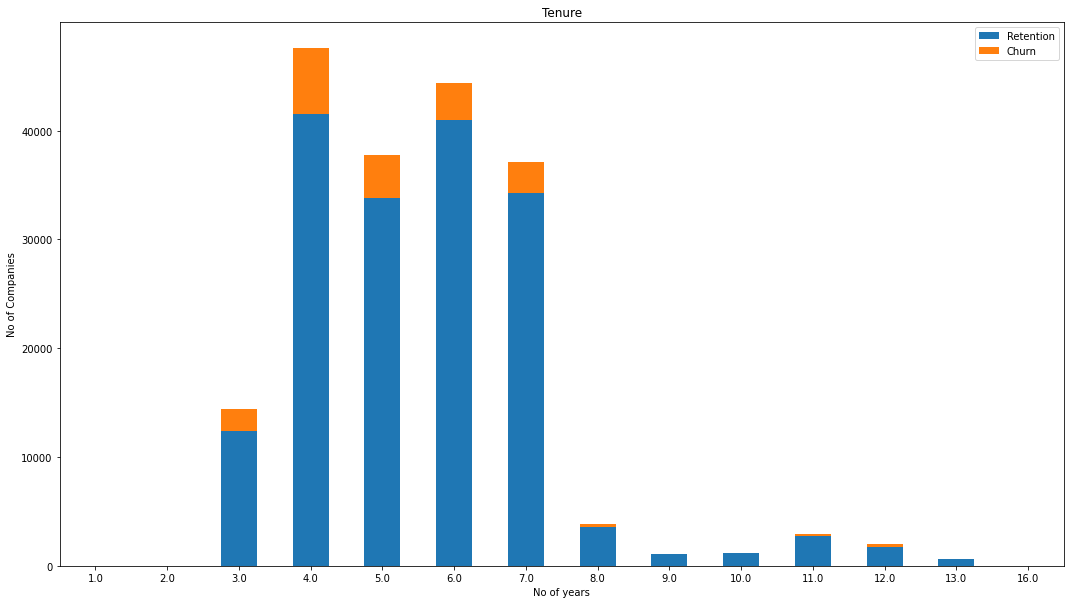

In [347]:
import matplotlib.pyplot as plt
tenure = df_resultant[['tenure','churn','id']].groupby(["tenure","churn"])['id'].count().unstack(level = 1) #examine the number of customers per churn and tenure value

tenure_percentage = (tenure.div(tenure.sum(axis = 1), axis = 0)*100)
tenure.plot(kind = 'bar', figsize = (18,10), stacked = True, rot = 0, title = 'Tenure')

plt.legend(['Retention','Churn'], loc = 'upper right')
plt.ylabel("No of Companies")
plt.xlabel("No of years")
plt.show()


We see that churning is problematic only for customers with tenures between **3-7 years inclusive**. This gives us useful information since recent and historically loyal customers do not churn and we only need to worry about customers in this antiquity range

In [348]:
#Note that since we already defined customer tenure, the num_years_antig column which represents the same thing can be removed.

df_resultant.drop(columns = ['num_years_antig'], inplace = True)

### Categorical Features Engineering

Categorical features include: new_activity, channel_sales, origin_up

In [349]:
df_resultant['activity_new'] = df_resultant['activity_new'].fillna('Null value counts')
cat_vc1_features_df = pd.DataFrame(df_resultant['activity_new'].value_counts())
df_resultant['channel_sales'] = df_resultant['channel_sales'].fillna('Null value counts')
cat_vc2_features_df = pd.DataFrame(df_resultant['channel_sales'].value_counts())
df_resultant['origin_up'] = df_resultant['origin_up'].fillna('Null value counts')
cat_vc3_features_df = pd.DataFrame(df_resultant['origin_up'].value_counts())

print("# categories for channel sales",len(cat_vc2_features_df))
print("# categories for new activity",len(cat_vc1_features_df))
print("# categories for origin_up",len(cat_vc3_features_df))

# categories for channel sales 8
# categories for new activity 420
# categories for origin_up 6


Above we have null values for some of the categories which we will deal with later. 

In [350]:
#there are many categories with very few data samples. We can replace these as null value categories
to_replace1 = list(cat_vc1_features_df[cat_vc1_features_df['activity_new'] < 50].index)

df_resultant['activity_new'] = df_resultant['activity_new'].replace(to_replace1,"Null value counts")

df_resultant['activity_new'].value_counts()

Null value counts                   120046
apdekpcbwosbxepsfxclislboipuxpop     18918
kkklcdamwfafdcfwofuscwfwadblfmce      5063
kwuslieomapmswolewpobpplkaooaaew      2750
fmwdwsxillemwbbwelxsampiuwwpcdcb      2628
                                     ...  
loocaafbwmoxefxdmslklikfaoukmlcf        60
cfeluxakapclbcismpfoefdmmplddekc        60
ompkmxdpkeikxipsowcmceceluupfwde        60
fuoxmsaoxbbpiwxfacdswabokfdxxwff        60
ifxluxelbupfwopcpulesflaaffmkipp        60
Name: activity_new, Length: 194, dtype: int64

In [351]:
#convert categorical data into binary values for classification analysis using the get_dummies function in pandas

channel_sales_categories = pd.get_dummies(df_resultant['channel_sales'], prefix = "channel")
new_activity_categories = pd.get_dummies(df_resultant['activity_new'], prefix = "activity")
origin_up_categories = pd.get_dummies(df_resultant['origin_up'], prefix = "origin")

#drop null value counts from all three dataframes
channel_sales_categories.drop(columns = ['channel_Null value counts'], inplace = True)
new_activity_categories.drop(columns = ['activity_Null value counts'], inplace = True)
origin_up_categories.drop(columns = ['origin_Null value counts'], inplace = True)


# next we add these to our dataframe and remove the existing categorical columns

df_resultant = pd.merge(df_resultant, channel_sales_categories, left_index = True, right_index = True)
df_resultant = pd.merge(df_resultant, new_activity_categories, left_index = True, right_index = True)
df_resultant = pd.merge(df_resultant, origin_up_categories, left_index = True, right_index = True)

#remove existing categorical columns

df_resultant.drop(columns = ['channel_sales','activity_new','origin_up'], inplace = True)

In [352]:
pd.set_option('display.max_columns', None)
df_resultant.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,tenure,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf,activity_abdiclmommkccxulxufwiiofdakbmfum,activity_acefxcckbdxakciukwuwepweawbkwmii,activity_acpmlkfcadicfcpslmoxcdakikieeeso,activity_afeccskfmobewicibxofslkxecsuekfi,activity_akifpcasepewecemeiapksusfxomwwbc,activity_akokxbmlwukcmwlimosloemdplieuuwm,activity_alkuukubieaxcobeeowowmokpbilomax,activity_almlfkoedpwfdmmsebsdwueskducuiok,activity_amfioduwmscbccofekcfcxpxokiiadpx,activity_apdekpcbwosbxepsfxclislboipuxpop,activity_apmpdisoaulbesoawkkekkcpokeaeucl,activity_awmiwfbewabdaduimwoefiluxdcdwsxb,activity_awoxilkbfwkemdseewlpbolidusdaeim,activity_axekkipoplpalkpikkkfdumlapcufmlb,activity_axsupumdipebmlbiwolspmkdouoiddbc,activity_balskueexlmuccwdffilikwxasupasxf,activity_bapcuxcousodpaabofsesslupodaapcx,activity_bdbcaommfeelfuofobfauflkiolollwk,activity_bdcmbkmcaussbssoseifimsfkpcuaksk,activity_bdwcuablpkfxxipoksbuuueckdukdifb,activity_bifsofauudeufolakwmpwwdxxcxeflas,activity_bkwukbmxeuobswdbbxdblsbfmfcasamo,activity_bsdfdwimlxbckukbdpidkbilwkebxbib,activity_bupfiimslwmifcsdllukmaeaxmbasium,activity_bweosldmwklxfssebduslduxppifcckp,activity_bwpaswkpcilmlklklcapcwwumwaodaoo,activity_bxopwkbwdewxssbmkwcummkaakbwafxf,activity_cawpikmdedxaabcllupdpfubuomcddxw,activity_cccpsslxcemdlomsaffxsecccbxpdkax,activity_cfdsselwimsklimddecfifseabdkxfcs,activity_cfeluxakapclbcismpfoefdmmplddekc,activity_ciixbauekwabolfbbbsswfupoiioowsd,activity_ckadsdebplpkplelfspfoiucmxkeppus,activity_ckeukxpofbwoacsdeimeoxeuxdblpkwl,activity_ckfxocssowaeipxueikxcmaxdmcduxsa,activity_ckmosmiuspskosddifpslwllwfkscxid,activity_clafkuosbouwewlexoewscfebeilpfok,activity_clbkplmouokdpxiwxebwculxxsdiuwap,activity_cluecxlameloamldmasudocsbmaoamdw,activity_cpdabambakwxsxwopeioebmcbsoplbws,activity_cpsbiipoacmouecemlddaxxdllacksaw,activity_cssldxpacdmuuaulamxdekcokibauube,activity_cwleuplwopmllxkbabaoeopmxxmfaiod,activity_cwofmuicebbcmiaaxufmfimpowpacobu,activity_cxdlpsmkulssdwsoskdmisdmdbcuebww,activity_daobdssbkieoukwxbopxiiospudkopwl,activity_dascbpmpfmfuexmfocmafmmamckebsxe,activity_dbaboadcmfudklmkkueepfamikbeaiwo,activity_dbiuixkxodixflmixcmbmmemluwsxaie,activity_ddkpdekmbfdffwdmabkiiilolsxswccl,activity_dfcsaaowsemmabpepocaeaaecfwppxxk,activity_dmklwapxmxxalfwupxepeiuoooduaueb,activity_duiwascsdupcmdfkspbukuuaklsawmmc,activity_dupxuibdflmskeieweeofcaluuuiioix,activity_dwamuluiuaiowuxmesuuilkbobidcmfo,activity_ebadppbpcufaidikpolbbxxfuelueofp,activity_ebebpkkmmosllfpxkeamimcmfpppfxbu,activity_edxmolisbfbwlpmccduowkxpkiiooess,activity_ekcdpfisfuemmpcauicoawcowfwlbpdu,activity_eldwcmdwfekwdubwxpuaklxdmkucsdki,activity_epmwweimsesebmlpseufxpckcxmmuxol,activity_esoiiifxdlbkcsluxmfuacbdckommixw,activity_fcbfabofwcdaosksieduepeeusawfdsi,activity_fcdfsumaxdslpwpxekaxasfuffeakxca,activity_fcoesawwkbuwfswmpimwkiplsumkoiei,activity_fcxomxuocpmxmfukiusfbfaccmiwfopx,activity_feadeidokwlullcdkcefdafcwkilxauu,activity_ffmciapbdkcwwiwpuakakmiexskcmxfc,activity_fibkpxbliefxfmeielcidsckcxkpofaa,activity_fkmblacmaapkaoauabpwpuweokkeiali,activity_flfasacakomelffwefsodlxedkoxfels,activity_fmwdwsxillemwbbwelxsampiuwwpcdcb,activity_focpboxmeucdmbaiseimfpiubpcmmcss,activity_fskfsbkdioupwobbsaoospkxaafmwobl,activity_fsoixmxdfowweuxusdclkapubxluefbi,activity_fswbowspcfidbaiuuwuicmmxdffupofp,activity_fuoxmsaoxbbpiwxfacdswabokfdxxwff,activity_fupwmsbfffpmcasudlsdmxc

The data has negative values which do not make sense (for instance, electric and gas consumption is negative meaning that the company is the consumer). Thus, we would need to deal with negative values in the dataframe.

In [353]:
numeric_columns = [col for col in df_resultant.columns if col in df_resultant.select_dtypes(include='number')]

for i in numeric_columns:
    df_resultant[df_resultant[i] < 0] = 0
df_resultant.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,tenure,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf,activity_abdiclmommkccxulxufwiiofdakbmfum,activity_acefxcckbdxakciukwuwepweawbkwmii,activity_acpmlkfcadicfcpslmoxcdakikieeeso,activity_afeccskfmobewicibxofslkxecsuekfi,activity_akifpcasepewecemeiapksusfxomwwbc,activity_akokxbmlwukcmwlimosloemdplieuuwm,activity_alkuukubieaxcobeeowowmokpbilomax,activity_almlfkoedpwfdmmsebsdwueskducuiok,activity_amfioduwmscbccofekcfcxpxokiiadpx,activity_apdekpcbwosbxepsfxclislboipuxpop,activity_apmpdisoaulbesoawkkekkcpokeaeucl,activity_awmiwfbewabdaduimwoefiluxdcdwsxb,activity_awoxilkbfwkemdseewlpbolidusdaeim,activity_axekkipoplpalkpikkkfdumlapcufmlb,activity_axsupumdipebmlbiwolspmkdouoiddbc,activity_balskueexlmuccwdffilikwxasupasxf,activity_bapcuxcousodpaabofsesslupodaapcx,activity_bdbcaommfeelfuofobfauflkiolollwk,activity_bdcmbkmcaussbssoseifimsfkpcuaksk,activity_bdwcuablpkfxxipoksbuuueckdukdifb,activity_bifsofauudeufolakwmpwwdxxcxeflas,activity_bkwukbmxeuobswdbbxdblsbfmfcasamo,activity_bsdfdwimlxbckukbdpidkbilwkebxbib,activity_bupfiimslwmifcsdllukmaeaxmbasium,activity_bweosldmwklxfssebduslduxppifcckp,activity_bwpaswkpcilmlklklcapcwwumwaodaoo,activity_bxopwkbwdewxssbmkwcummkaakbwafxf,activity_cawpikmdedxaabcllupdpfubuomcddxw,activity_cccpsslxcemdlomsaffxsecccbxpdkax,activity_cfdsselwimsklimddecfifseabdkxfcs,activity_cfeluxakapclbcismpfoefdmmplddekc,activity_ciixbauekwabolfbbbsswfupoiioowsd,activity_ckadsdebplpkplelfspfoiucmxkeppus,activity_ckeukxpofbwoacsdeimeoxeuxdblpkwl,activity_ckfxocssowaeipxueikxcmaxdmcduxsa,activity_ckmosmiuspskosddifpslwllwfkscxid,activity_clafkuosbouwewlexoewscfebeilpfok,activity_clbkplmouokdpxiwxebwculxxsdiuwap,activity_cluecxlameloamldmasudocsbmaoamdw,activity_cpdabambakwxsxwopeioebmcbsoplbws,activity_cpsbiipoacmouecemlddaxxdllacksaw,activity_cssldxpacdmuuaulamxdekcokibauube,activity_cwleuplwopmllxkbabaoeopmxxmfaiod,activity_cwofmuicebbcmiaaxufmfimpowpacobu,activity_cxdlpsmkulssdwsoskdmisdmdbcuebww,activity_daobdssbkieoukwxbopxiiospudkopwl,activity_dascbpmpfmfuexmfocmafmmamckebsxe,activity_dbaboadcmfudklmkkueepfamikbeaiwo,activity_dbiuixkxodixflmixcmbmmemluwsxaie,activity_ddkpdekmbfdffwdmabkiiilolsxswccl,activity_dfcsaaowsemmabpepocaeaaecfwppxxk,activity_dmklwapxmxxalfwupxepeiuoooduaueb,activity_duiwascsdupcmdfkspbukuuaklsawmmc,activity_dupxuibdflmskeieweeofcaluuuiioix,activity_dwamuluiuaiowuxmesuuilkbobidcmfo,activity_ebadppbpcufaidikpolbbxxfuelueofp,activity_ebebpkkmmosllfpxkeamimcmfpppfxbu,activity_edxmolisbfbwlpmccduowkxpkiiooess,activity_ekcdpfisfuemmpcauicoawcowfwlbpdu,activity_eldwcmdwfekwdubwxpuaklxdmkucsdki,activity_epmwweimsesebmlpseufxpckcxmmuxol,activity_esoiiifxdlbkcsluxmfuacbdckommixw,activity_fcbfabofwcdaosksieduepeeusawfdsi,activity_fcdfsumaxdslpwpxekaxasfuffeakxca,activity_fcoesawwkbuwfswmpimwkiplsumkoiei,activity_fcxomxuocpmxmfukiusfbfaccmiwfopx,activity_feadeidokwlullcdkcefdafcwkilxauu,activity_ffmciapbdkcwwiwpuakakmiexskcmxfc,activity_fibkpxbliefxfmeielcidsckcxkpofaa,activity_fkmblacmaapkaoauabpwpuweokkeiali,activity_flfasacakomelffwefsodlxedkoxfels,activity_fmwdwsxillemwbbwelxsampiuwwpcdcb,activity_focpboxmeucdmbaiseimfpiubpcmmcss,activity_fskfsbkdioupwobbsaoospkxaafmwobl,activity_fsoixmxdfowweuxusdclkapubxluefbi,activity_fswbowspcfidbaiuuwuicmmxdffupofp,activity_fuoxmsaoxbbpiwxfacdswabokfdxxwff,activity_fupwmsbfffpmcasudlsdmxc

We can now proceed to correct for heavily skewed data as seen in the above dataframe. Doing so would allow us to approximate our data normally (zero skewness since data is symetrically distributed) which would ease our analysis.

### Skewness Correction

Most of the data is right-skewed towards the 75th percentile. We can normalize our data through applying algebraic roots such as square-roots or cube-roots or even apply a log transformation. In this example, since the data is heavily right-skewed, the log-transformation seems like a good fit.


In [354]:
#pd.DataFrame({'columns':df_resultant.columns,'sk':df_resultant.columns.quantile(q = 0.75)}).head(40)
quantile_diff_percentage = ((df_resultant.describe().transpose()['75%'].transpose() - 
                             df_resultant.describe().transpose()['50%'].transpose())/df_resultant.describe().transpose()['50%'].transpose()) * 100
quantile_diff_percentage = pd.DataFrame({'Columns with significant right skewedness as measured by % difference between median and 3rd quartile':quantile_diff_percentage[quantile_diff_percentage > 100]})
quantile_diff_percentage.sort_values(by = 'Columns with significant right skewedness as measured by % difference between median and 3rd quartile', ascending = False)

,Columns with significant right skewedness as measured by % difference between median and 3rd quartile
forecast_price_energy_p2,inf
price_p2_var,inf
origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,inf
channel_foosdfpfkusacimwkcsosbicdxkicaua,inf
price_p3_fix,inf
price_p2_fix,inf
price_p3_var,inf
origin_lxidpiddsbxsbosboudacockeimpuepw,inf
imp_cons,984.850374
forecast_cons_year,964.583333


In [355]:
#we will log transform columns from imp_cons onwards, and remove 'forecast_price_energy_p2' from our dataframe
df_resultant.drop(columns = ['forecast_price_energy_p2'], inplace = True)

In [356]:
df_resultant['imp_cons'] = np.log(1 + df_resultant['imp_cons'])
df_resultant['forecast_cons_year'] = np.log(1 + df_resultant['forecast_cons_year'])
df_resultant['forecast_meter_rent_12m'] = np.log(1 + df_resultant['forecast_meter_rent_12m'])
df_resultant['forecast_base_bill_ele'] = np.log(1 + df_resultant['forecast_base_bill_ele'])
df_resultant['forecast_base_bill_year'] = np.log(1 + df_resultant['forecast_base_bill_year'])
df_resultant['forecast_cons'] = np.log(1 + df_resultant['forecast_cons'])
df_resultant['cons_last_month'] = np.log(1 + df_resultant['cons_last_month'])
df_resultant['cons_12m'] = np.log(1 + df_resultant['cons_12m'])
df_resultant['cons_gas_12m'] = np.log(1 + df_resultant['cons_gas_12m'])
df_resultant['forecast_bill_12m'] = np.log(1 + df_resultant['forecast_bill_12m'])
df_resultant['forecast_cons_12m'] = np.log(1 + df_resultant['forecast_cons_12m'])
df_resultant['net_margin'] = np.log(1 + df_resultant['net_margin'])

In [357]:
df_resultant.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,tenure,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf,activity_abdiclmommkccxulxufwiiofdakbmfum,activity_acefxcckbdxakciukwuwepweawbkwmii,activity_acpmlkfcadicfcpslmoxcdakikieeeso,activity_afeccskfmobewicibxofslkxecsuekfi,activity_akifpcasepewecemeiapksusfxomwwbc,activity_akokxbmlwukcmwlimosloemdplieuuwm,activity_alkuukubieaxcobeeowowmokpbilomax,activity_almlfkoedpwfdmmsebsdwueskducuiok,activity_amfioduwmscbccofekcfcxpxokiiadpx,activity_apdekpcbwosbxepsfxclislboipuxpop,activity_apmpdisoaulbesoawkkekkcpokeaeucl,activity_awmiwfbewabdaduimwoefiluxdcdwsxb,activity_awoxilkbfwkemdseewlpbolidusdaeim,activity_axekkipoplpalkpikkkfdumlapcufmlb,activity_axsupumdipebmlbiwolspmkdouoiddbc,activity_balskueexlmuccwdffilikwxasupasxf,activity_bapcuxcousodpaabofsesslupodaapcx,activity_bdbcaommfeelfuofobfauflkiolollwk,activity_bdcmbkmcaussbssoseifimsfkpcuaksk,activity_bdwcuablpkfxxipoksbuuueckdukdifb,activity_bifsofauudeufolakwmpwwdxxcxeflas,activity_bkwukbmxeuobswdbbxdblsbfmfcasamo,activity_bsdfdwimlxbckukbdpidkbilwkebxbib,activity_bupfiimslwmifcsdllukmaeaxmbasium,activity_bweosldmwklxfssebduslduxppifcckp,activity_bwpaswkpcilmlklklcapcwwumwaodaoo,activity_bxopwkbwdewxssbmkwcummkaakbwafxf,activity_cawpikmdedxaabcllupdpfubuomcddxw,activity_cccpsslxcemdlomsaffxsecccbxpdkax,activity_cfdsselwimsklimddecfifseabdkxfcs,activity_cfeluxakapclbcismpfoefdmmplddekc,activity_ciixbauekwabolfbbbsswfupoiioowsd,activity_ckadsdebplpkplelfspfoiucmxkeppus,activity_ckeukxpofbwoacsdeimeoxeuxdblpkwl,activity_ckfxocssowaeipxueikxcmaxdmcduxsa,activity_ckmosmiuspskosddifpslwllwfkscxid,activity_clafkuosbouwewlexoewscfebeilpfok,activity_clbkplmouokdpxiwxebwculxxsdiuwap,activity_cluecxlameloamldmasudocsbmaoamdw,activity_cpdabambakwxsxwopeioebmcbsoplbws,activity_cpsbiipoacmouecemlddaxxdllacksaw,activity_cssldxpacdmuuaulamxdekcokibauube,activity_cwleuplwopmllxkbabaoeopmxxmfaiod,activity_cwofmuicebbcmiaaxufmfimpowpacobu,activity_cxdlpsmkulssdwsoskdmisdmdbcuebww,activity_daobdssbkieoukwxbopxiiospudkopwl,activity_dascbpmpfmfuexmfocmafmmamckebsxe,activity_dbaboadcmfudklmkkueepfamikbeaiwo,activity_dbiuixkxodixflmixcmbmmemluwsxaie,activity_ddkpdekmbfdffwdmabkiiilolsxswccl,activity_dfcsaaowsemmabpepocaeaaecfwppxxk,activity_dmklwapxmxxalfwupxepeiuoooduaueb,activity_duiwascsdupcmdfkspbukuuaklsawmmc,activity_dupxuibdflmskeieweeofcaluuuiioix,activity_dwamuluiuaiowuxmesuuilkbobidcmfo,activity_ebadppbpcufaidikpolbbxxfuelueofp,activity_ebebpkkmmosllfpxkeamimcmfpppfxbu,activity_edxmolisbfbwlpmccduowkxpkiiooess,activity_ekcdpfisfuemmpcauicoawcowfwlbpdu,activity_eldwcmdwfekwdubwxpuaklxdmkucsdki,activity_epmwweimsesebmlpseufxpckcxmmuxol,activity_esoiiifxdlbkcsluxmfuacbdckommixw,activity_fcbfabofwcdaosksieduepeeusawfdsi,activity_fcdfsumaxdslpwpxekaxasfuffeakxca,activity_fcoesawwkbuwfswmpimwkiplsumkoiei,activity_fcxomxuocpmxmfukiusfbfaccmiwfopx,activity_feadeidokwlullcdkcefdafcwkilxauu,activity_ffmciapbdkcwwiwpuakakmiexskcmxfc,activity_fibkpxbliefxfmeielcidsckcxkpofaa,activity_fkmblacmaapkaoauabpwpuweokkeiali,activity_flfasacakomelffwefsodlxedkoxfels,activity_fmwdwsxillemwbbwelxsampiuwwpcdcb,activity_focpboxmeucdmbaiseimfpiubpcmmcss,activity_fskfsbkdioupwobbsaoospkxaafmwobl,activity_fsoixmxdfowweuxusdclkapubxluefbi,activity_fswbowspcfidbaiuuwuicmmxdffupofp,activity_fuoxmsaoxbbpiwxfacdswabokfdxxwff,activity_fupwmsbfffpmcasudlsdmxckmuxsuaku,activity_fwfifi

Now that we have accounted for skewness, we can perform correlation analyses on the features. We will identify and address issues of multicollinearity.

In [358]:
correlation_matrix = df_resultant.corr()

for i in correlation_matrix:
    for j in correlation_matrix:
        if correlation_matrix[i][j] < 0.7:
            correlation_matrix[i][j] = np.nan

correlation_matrix = correlation_matrix.iloc[:20,:20]

We will plot the correlation heatmap to assess the highly-correlated features

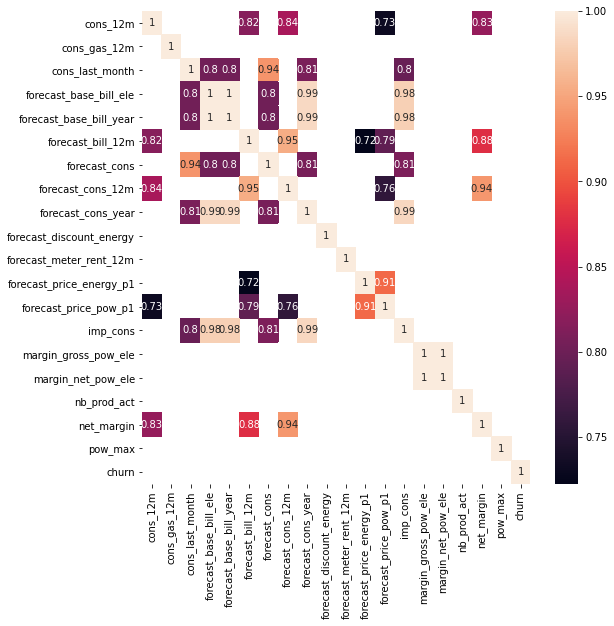

In [359]:
import seaborn as sns
plt.figure(figsize = (8.7,8.7))
sns.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns.values,
 yticklabels=correlation_matrix.columns.values, annot = True)

# Axes ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

As expected, there is a strong correlation between forcasted consumption data in our model. We observe that the variable forecast_cons_year is very highly correlated with other forecast columns so we can get rid of it. Additionally, we can remove the following columns because of their significant contributions towards multicollinearity:

1. forecast_base_bill_ele
2. forecast_base_bill_year
3. forecast_bill_12m
4


In [360]:
df_resultant.drop(columns = ['forecast_bill_12m','forecast_base_bill_year','forecast_base_bill_ele', 'forecast_cons_year', 'forecast_cons'], inplace = True)

In [361]:
df_resultant.corr()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,tenure,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf,activity_abdiclmommkccxulxufwiiofdakbmfum,activity_acefxcckbdxakciukwuwepweawbkwmii,activity_acpmlkfcadicfcpslmoxcdakikieeeso,activity_afeccskfmobewicibxofslkxecsuekfi,activity_akifpcasepewecemeiapksusfxomwwbc,activity_akokxbmlwukcmwlimosloemdplieuuwm,activity_alkuukubieaxcobeeowowmokpbilomax,activity_almlfkoedpwfdmmsebsdwueskducuiok,activity_amfioduwmscbccofekcfcxpxokiiadpx,activity_apdekpcbwosbxepsfxclislboipuxpop,activity_apmpdisoaulbesoawkkekkcpokeaeucl,activity_awmiwfbewabdaduimwoefiluxdcdwsxb,activity_awoxilkbfwkemdseewlpbolidusdaeim,activity_axekkipoplpalkpikkkfdumlapcufmlb,activity_axsupumdipebmlbiwolspmkdouoiddbc,activity_balskueexlmuccwdffilikwxasupasxf,activity_bapcuxcousodpaabofsesslupodaapcx,activity_bdbcaommfeelfuofobfauflkiolollwk,activity_bdcmbkmcaussbssoseifimsfkpcuaksk,activity_bdwcuablpkfxxipoksbuuueckdukdifb,activity_bifsofauudeufolakwmpwwdxxcxeflas,activity_bkwukbmxeuobswdbbxdblsbfmfcasamo,activity_bsdfdwimlxbckukbdpidkbilwkebxbib,activity_bupfiimslwmifcsdllukmaeaxmbasium,activity_bweosldmwklxfssebduslduxppifcckp,activity_bwpaswkpcilmlklklcapcwwumwaodaoo,activity_bxopwkbwdewxssbmkwcummkaakbwafxf,activity_cawpikmdedxaabcllupdpfubuomcddxw,activity_cccpsslxcemdlomsaffxsecccbxpdkax,activity_cfdsselwimsklimddecfifseabdkxfcs,activity_cfeluxakapclbcismpfoefdmmplddekc,activity_ciixbauekwabolfbbbsswfupoiioowsd,activity_ckadsdebplpkplelfspfoiucmxkeppus,activity_ckeukxpofbwoacsdeimeoxeuxdblpkwl,activity_ckfxocssowaeipxueikxcmaxdmcduxsa,activity_ckmosmiuspskosddifpslwllwfkscxid,activity_clafkuosbouwewlexoewscfebeilpfok,activity_clbkplmouokdpxiwxebwculxxsdiuwap,activity_cluecxlameloamldmasudocsbmaoamdw,activity_cpdabambakwxsxwopeioebmcbsoplbws,activity_cpsbiipoacmouecemlddaxxdllacksaw,activity_cssldxpacdmuuaulamxdekcokibauube,activity_cwleuplwopmllxkbabaoeopmxxmfaiod,activity_cwofmuicebbcmiaaxufmfimpowpacobu,activity_cxdlpsmkulssdwsoskdmisdmdbcuebww,activity_daobdssbkieoukwxbopxiiospudkopwl,activity_dascbpmpfmfuexmfocmafmmamckebsxe,activity_dbaboadcmfudklmkkueepfamikbeaiwo,activity_dbiuixkxodixflmixcmbmmemluwsxaie,activity_ddkpdekmbfdffwdmabkiiilolsxswccl,activity_dfcsaaowsemmabpepocaeaaecfwppxxk,activity_dmklwapxmxxalfwupxepeiuoooduaueb,activity_duiwascsdupcmdfkspbukuuaklsawmmc,activity_dupxuibdflmskeieweeofcaluuuiioix,activity_dwamuluiuaiowuxmesuuilkbobidcmfo,activity_ebadppbpcufaidikpolbbxxfuelueofp,activity_ebebpkkmmosllfpxkeamimcmfpppfxbu,activity_edxmolisbfbwlpmccduowkxpkiiooess,activity_ekcdpfisfuemmpcauicoawcowfwlbpdu,activity_eldwcmdwfekwdubwxpuaklxdmkucsdki,activity_epmwweimsesebmlpseufxpckcxmmuxol,activity_esoiiifxdlbkcsluxmfuacbdckommixw,activity_fcbfabofwcdaosksieduepeeusawfdsi,activity_fcdfsumaxdslpwpxekaxasfuffeakxca,activity_fcoesawwkbuwfswmpimwkiplsumkoiei,activity_fcxomxuocpmxmfukiusfbfaccmiwfopx,activity_feadeidokwlullcdkcefdafcwkilxauu,activity_ffmciapbdkcwwiwpuakakmiexskcmxfc,activity_fibkpxbliefxfmeielcidsckcxkpofaa,activity_fkmblacmaapkaoauabpwpuweokkeiali,activity_flfasacakomelffwefsodlxedkoxfels,activity_fmwdwsxillemwbbwelxsampiuwwpcdcb,activity_focpboxmeucdmbaiseimfpiubpcmmcss,activity_fskfsbkdioupwobbsaoospkxaafmwobl,activity_fsoixmxdfowweuxusdclkapubxluefbi,activity_fswbowspcfidbaiuuwuicmmxdffupofp,activity_fuoxmsaoxbbpiwxfacdswabokfdxxwff,activity_fupwmsbfffpmcasudlsdmxckmuxsuaku,activity_fwfifipcmomuacibieekffilsbxsfcsk,activity_fxwoeaeiuwupxmeoxdmbfeefexbiuufi,activity_iabskbxembdweacmalxp

## Model Development and Application

We will deploy a logistic regression model to predict whether customers churn or not based on all the explanatory variables we dealt with in our feature engineering.

Second, we will do the same thing but this time with the price variables as our features. Finally, we will compare the accuracy of both models and answer our initial hypothesis.

In [413]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression(solver = 'liblinear')

x_columns = [col for col in df_resultant.columns if col not in['churn','id','date_first_activ','date_modif_prod','date_renewal','price_date']]
X = np.array(df_resultant[x_columns])

y = np.array(df_resultant['churn'])

#Splitting the model into testing and training sets, with 30% kept aside only for testing
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

#fitting the model 
LR_train = logreg.fit(x_train,y_train)
yhat_train = LR_train.predict(x_train) #predicting customer churn outcomes from the trained model on the test set
yhat_train_prob = LR_train.predict_proba(x_train)

LR_test = logreg.fit(x_test,y_test)
yhat_test = LR_test.predict(x_test) #predicting customer churn outcomes from the trained model on the test set
yhat_test_prob = LR_test.predict_proba(x_test)

## Evaluation - Training and Out of Sample Accuracy

The performance of an ML Classification model is determined by it's Training Accuracy and Out of Sample Accuracy. 

The training accuracy compares the predicted and actual values of the training sets which the model has already been exposed to, thus we can guage the predictive power of the model. Logically we want this value to be as high as possible; however, we do not want it to be an exact match since that would overfit the original model.

The out-of-sample accuracy measures how well the model performs to unseen data. This is measured by comparing predicted and actual labels from the test set. While the training accuracy measures the model's predictive power with data it has been fed, the testing accuracy denotes its performance in the real-world - to unseen data. We would like this value to be maximized.

In [370]:
def Model_Evaluation(train_set, test_set, train_predicted, test_predicted):
    """------------------------------------------------------------------------------
Takes four distinct model datasets for training ad testing data, and outputs
the model's accuracy with the same.

Parameters:  train_set: target values in the training set
             test_set: target values in the test set
             train_predicted: ML model's prediction set on training data
             test_predicted: ML model's prediction set on test data
----------------------------------------------------------------------------- """
    exact_matches_test = 0
    exact_matches_train = 0
    for i in range(0,len(test_predicted)):
        if test_predicted[i] == test_set [i]:
            exact_matches_test += 1
    for j in range(0,len(train_predicted)):
        if train_predicted[i] == train_set [i]:
            exact_matches_train += 1
    training_accuracy = exact_matches_train/len(train_set)
    testing_accuracy = exact_matches_test/len(test_set)
    print("Training Accuracy is: ",training_accuracy)
    print("Out of Sample Accuracy is: ",testing_accuracy)

Model_Evaluation(y_train, y_test, yhat_train, yhat_test)


Training Accuracy is:  1.0
Out of Sample Accuracy is:  0.907808155299563


As seen above, our model performed perfectly on seen data, and accurately predicted the correct customer churn outcome 
approximately 91% of the time on unseen data. Overall we have a highy functional model that is trustworthy. 
We can therefore proceed to evaluate our 2 hypotheses under consideration.


### Hypothesis 1 - Price is the primary driver of customer churn

We will test the relative importance of various features in our model and determine which ones drive churn the most. To accomplish this, we will conduct a **Features Importance** analysis on all independant variables in the model.

In [401]:
#make use of coefficients in the Logistic Regression equations to assess relative importances of model's features.

col_feature = x_columns[:22]
feature_importance = pd.DataFrame(col_feature, columns= ['features'])

#In logistic Regession, we exponantiate the coefficients of the features that go into the model to determine their relative 
#importance in the probabilistic outcomes for churn.
import math
feature_importance['importance'] = pow(math.e,LR_train.coef_[0][:22])

feature_importance.sort_values(by = ['importance'], ascending = False, inplace = True)
feature_importance

,features,importance
16,price_p2_var,5.045952
11,margin_net_pow_ele,1.781113
13,net_margin,1.216160
18,price_p1_fix,1.063142
12,nb_prod_act,1.059256
20,price_p3_fix,1.030540
7,forecast_price_pow_p1,1.017437
5,forecast_meter_rent_12m,1.015329
1,cons_gas_12m,1.014035
0,cons_12m,1.009325


As expected the net margin on electricity is of of the key feature driving the customer churn. Higher margins correspond to greater gains on the charge of utility services which ultimately reflects the increasing utility costs/price charged to customers. 

We can also confirm this by looking at the first 6 rows of the features importance dataframe, 3 of which are price variables with the most important being the **fluctuating cost of utilities in the second period: price_p2_var**. Thus, the churn is primarily driven by the increased cost of utilities to the client's customers.

## Hypothesis 2 - Impact of discounts on customer churn

The client wants to evaluate the success of offering high propensity to churn customers, a 20% discount on utility costs. In order to conduct this analysis we would need to do the following:

1. Calculate expected revenues for each customer assuming their churn outcomes, and forecasted consumption and price data before offering a discount.
2. Perform the same calculation as outlined in step 2 but with the high-propensity-churning customers receiving a discount and the rest not receiving any discount.
3. Evaluate the difference between caluclations in the previous 2 steps to examine the revenue gains from such a strategy.


In [439]:
df_resultant['estimated revenue'] = ((pow(math.e, df_resultant['forecast_cons_12m']) + 1)* df_resultant['forecast_price_energy_p1']) 
+ df_resultant['forecast_meter_rent_12m']

df_resultant['expected revenue after churn'] = df_resultant['estimated revenue'] * (1 - (0.919 * df_resultant['churn']))


In [449]:
cutoff_prob_for_discount_of_20_percent = 0.625 #customers who are at least 62.5% likely to churn will be given a 20% discount

def Revenue_Gains(DF: pd.DataFrame, cutoff_prob_for_discount_of_20_percent: float):
    DF['discount_revenue'] = DF['expected revenue after churn']
    #find churn probabilities of all customers
    DF['churn probabilities of customers'] = np.array(LR_train.predict_proba(X)).reshape(-1,2)[:,1] 
    DF.loc[df_resultant['churn probabilities of customers'] >= cutoff_prob_for_discount_of_20_percent, 'discount_revenue'] = DF['estimated revenue'] * (1 - 0.2)
    DF['revenue_gains_from_discount'] = DF['discount_revenue'] - DF['expected revenue after churn']
    total_gains = DF['revenue_gains_from_discount'].sum()
    return total_gains

Now that we have modeled the possible revenue gains from the discounting strategy, we must find a way to vary parameters which would maximize these revenue gains from offering a discount.One such easy parameter to choose would be the churn-likelihood cutoff.

In [464]:
discount_cutoff_probabilities = np.arange(0, 1, 0.01)

revenue_gains = []

for i in discount_cutoff_probabilities:
    result = Revenue_Gains(df_resultant,i)
    revenue_gains.extend([i, result])

df_outcome = pd.DataFrame({'cutoff score':np.array(revenue_gains).reshape(-1,2)[:,0],'Revenue Gain': np.array(revenue_gains).reshape(-1,2)[:,1]})

In [471]:
df_outcome.sort_values(by = 'Revenue Gain', ascending = False).head()

,cutoff score,Revenue Gain
13,0.13,3.233118e+06
17,0.17,3.233117e+06
16,0.16,3.233114e+06
14,0.14,3.233114e+06
18,0.18,3.233113e+06


In Conclusion, the 20% discount offering strategy is an effective one as it leads to much larger revenues for the utility provider annually; however, in order for this customer retention strategy to be most effective, the company would need to set a cutoff score of **0.13** (as seen in the first row of the outcomes dataframe).

This means that if a 20 percent discount is offered to all customers with a churn probability greater than 13%, these customers will be retained and the revenue gains from such a retention will be maximized for the utility provider even after accounting for a decline in potential earnings as a result of the discount offering.
